# Tugas Besar Machine Learning - Classification 
## Kelompok 21
## Nama Anggota: 
## Gian Maxmillian Firdaus (1301190209)
## Muhammad Afryan Saputra (1301190013)
## Zakia Syahrini (1301194108)

### Formulasi Masalah

Diberikan file dataset: kendaraan berisi beberapa kolom mengenai data pelanggan dari suatu dealer. Data akan digunakan untuk pembuatan model yang akan memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.

### Library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="whitegrid")
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Membaca data source

Data source yang dibaca diambil dari file: kendaraan_train.csv, kendaraan_test.csv

In [2]:
df_train = pd.read_csv(".\datasets\kendaraan_train.csv")
df_test = pd.read_csv(".\datasets\kendaraan_test.csv")

### Melihat dataset
Untuk melihat preview dari data source `kendaraan_train.csv` dan `kendaraan_test.csv`.

In [3]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


### Menghitung jumlah baris dan kolom dari dataset

In [5]:
print('Dataset TRAIN: ',df_train.shape)
print('Dataset TEST: ',df_test.shape)

Dataset TRAIN:  (285831, 12)
Dataset TEST:  (47639, 11)


### Menampilkan info dari dataset

In [6]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df_test.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000
mean,38.815466,0.997922,26.331514,0.457608,30626.481202,112.180566,154.447574,0.123029
std,15.548817,0.045540,13.213353,0.498205,17404.792248,54.162703,83.642137,0.328474
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24395.500000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31738.000000,135.000000,155.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39474.500000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Menghitung jumlah nilai kosong pada setiap kolom dari dataset

In [8]:
print('Dataset TRAIN----------')
print(df_train.isnull().sum())
print('')
print('Dataset TEST-----------')
print(df_test.isnull().sum())

Dataset TRAIN----------
id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Dataset TEST-----------
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


Untuk data `test` semua kolomnya tidak ada data yang kosong atau null, sedangkan untuk data `train` hanya kolom {id} dan kolom {Tertarik} yang tidak mempunyai nilai kosong atau null. Untuk itu diperlukan tahap pembersihan data.

### Membersihkan dataset
Semua baris yang kolomnya bernilai null atau kosong akan di buang.
Tujuannya supaya dataset yang akan diolah sudah dalam keadaan bersih.

In [9]:
df_train.dropna(inplace = True, axis = 0)
df_train.shape

(171068, 12)

Sebelum dibersihkan jumlah baris = 285831, Setelah dibersihkan jumlah baris = 171068

### Membuat index baru
Karena kolom {id} penomorannya sudah tidak teratur akibat pembersihan data, maka kolom {id} di drop
dan selanjutnya membuat index yang baru.

In [10]:
df_train = df_train.drop(["id"], axis = 1)
df_train = df_train.reset_index(drop=True)

In [11]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
3,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
4,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0


Kolom {id} sudah di drop dan dataset sudah memiliki indeks yang baru

### Mengkonversi kolom dengan tipe data objek menjadi numerikal
Tujuan: agar pengolahan data mudah dilakukan

In [12]:
#Jenis Kelamin
df_train["Jenis_Kelamin"] = df_train["Jenis_Kelamin"].replace(["Pria", "Wanita"], [1,0])
df_test["Jenis_Kelamin"] = df_train["Jenis_Kelamin"].replace(["Pria", "Wanita"], [1,0])

#Umur Kendaraan
df_train["Umur_Kendaraan"] = df_train["Umur_Kendaraan"].replace(["< 1 Tahun", "> 2 Tahun", "1-2 Tahun"], [1,3,2])
df_test["Umur_Kendaraan"] = df_train["Umur_Kendaraan"].replace(["< 1 Tahun", "> 2 Tahun", "1-2 Tahun"], [1,3,2])

#Kendaraan Rusak
df_train["Kendaraan_Rusak"] = df_train["Kendaraan_Rusak"].replace(["Pernah", "Tidak"], [1,0])
df_test["Kendaraan_Rusak"] = df_train["Kendaraan_Rusak"].replace(["Pernah", "Tidak"], [1,0])

print('Dataset `TRAIN`')
df_train.head()

Dataset `TRAIN`


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,3,1,25800.0,29.0,158.0,0
2,0,58.0,1.0,48.0,0.0,2,0,2630.0,124.0,63.0,0
3,1,21.0,1.0,35.0,1.0,1,0,22735.0,152.0,171.0,0
4,0,20.0,1.0,8.0,1.0,1,0,30786.0,160.0,31.0,0


In [13]:
print('Dataset `TEST`')
df_test.head()

Dataset `TEST`


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,0,46963,26,145,0
1,1,22,1,47,1,3,1,39624,152,241,0
2,0,24,1,28,1,2,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,0,35,1,23,0,1,0,26963,152,229,0


### Keterangan:
##### Jenis_Kelamin: 0 - Wanita, 1 - Pria
##### Umur_Kendaraan: 1 : "< 1 Tahun", 2 : "1-2 Tahun", 3 : "> 2 Tahun"
##### Kendaraan_Rusak: 0 : "Tidak, 1 : "Pernah"

### Export Dataset

In [14]:
df_train.to_csv('.\datasets\kendaraan_train_new.csv')
df_test.to_csv('.\datasets\kendaraan_test_new.csv')

### Men - scalling dataset
Tujuan: supaya seluruh kolom dalam dataset berada dalam jangkauan yang sama.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
3,1.0,0.015385,1.0,0.673077,1.0,0.0,0.0,0.037402,0.932099,0.557093,0.0
4,0.0,0.000000,1.0,0.153846,1.0,0.0,0.0,0.052380,0.981481,0.072664,0.0
...,...,...,...,...,...,...,...,...,...,...,...
171063,0.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.043454,0.932099,0.716263,0.0
171064,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.078239,0.932099,0.138408,0.0
171065,0.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.087661,0.932099,0.747405,0.0
171066,1.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.051853,0.759259,0.899654,0.0


In [16]:
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.446154,1.0,0.153846,0.0,0.0,0.0,0.082475,0.154321,0.467128,0.0
1,1.0,0.030769,1.0,0.903846,1.0,1.0,1.0,0.068822,0.932099,0.799308,0.0
2,0.0,0.061538,1.0,0.538462,1.0,0.5,0.0,0.200636,0.932099,0.179931,0.0
3,1.0,0.400000,1.0,0.153846,1.0,0.0,0.0,0.062575,0.759259,0.083045,0.0
4,0.0,0.230769,1.0,0.442308,0.0,0.0,0.0,0.045268,0.932099,0.757785,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1.0,0.630769,1.0,0.884615,0.0,0.5,0.0,0.052851,0.759259,0.197232,0.0
47635,1.0,0.323077,1.0,0.288462,0.0,0.5,1.0,0.000000,0.962963,0.768166,0.0
47636,0.0,0.061538,1.0,0.557692,1.0,0.0,0.0,0.056687,0.932099,0.695502,0.0
47637,0.0,0.600000,1.0,0.576923,0.0,0.5,1.0,0.065406,0.154321,0.792388,1.0


### Membuat Korelasi antar Kolom / Variabel
Tujuan: memperoleh hubungan antar variabel dengan variabel lainnya.

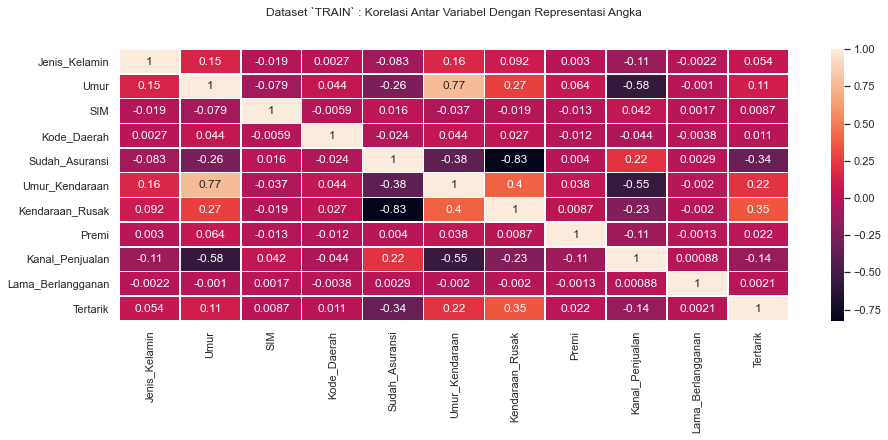

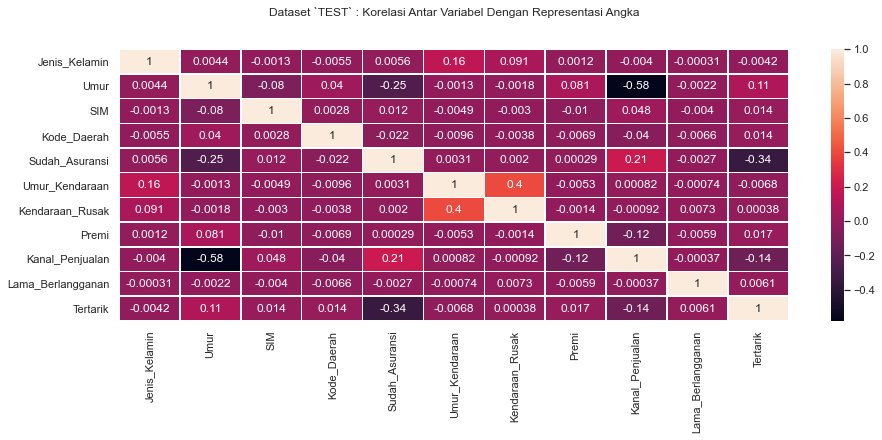

In [17]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_train.corr(), annot = True,linewidths=.5)
plt.title("Dataset `TRAIN` : Korelasi Antar Variabel Dengan Representasi Angka",y=1.1)
plt.show()

plt.figure(figsize=(15, 5))
sns.heatmap(df_test.corr(), annot = True,linewidths=.5)
plt.title("Dataset `TEST` : Korelasi Antar Variabel Dengan Representasi Angka",y=1.1)
plt.show()

### Tahap: Splitting Dataset

In [18]:
# Split Data Train
X_train = df_train.drop('Tertarik', axis=1)
y_train = df_train['Tertarik'].values

# Split Data Test
X_test = df_test.drop('Tertarik', axis=1)
y_test = df_test['Tertarik'].values

X = df_train[df_train.columns[:10]]
y = df_train['Tertarik']

print('Dataset X_train: ',X_train.shape)
print('Dataset X_test: ',X_test.shape)

Dataset X_train:  (171068, 10)
Dataset X_test:  (47639, 10)


## Tahap: Pemodelan

## Naive Bayes Classification
Prosedur Naive Bayes Classification

In [19]:
class NaiveBayesClassifier():
    '''
    Teorema Naive Bayes
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        hitung prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        hitung mean, variance dari setiap kolom dan konversi ke numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        probability density function menurut wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), dimana μ is mean (rata-rata), 
        σ² adalah variance, σ adalah standard deviasi 
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # hitung posterior probability untuk setiap class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## gunakan log untuk stabilisasi secara  numerik
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # gunakan log untuk stabilisasi secara  numerik
            posterior = prior + conditional
            posteriors.append(posterior)
        # ambil nilai tertinggi dari posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10,3))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('Perbandingan True vs Predicted', fontsize=12)

        ax[0].tick_params(labelsize=10)
        ax[1].tick_params(labelsize=10)
        ax[0].set_title("Nilai True", fontsize=10)
        ax[1].set_title("Nilai Predicted", fontsize=10)
        plt.show()

### Tahap Pengolahan
- Dataset di `random`
- Data `test` diambil sebanyak 30%
- Dataset di olah dengan `Metode Naive Bayes Classifier`

In [20]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
model = NaiveBayesClassifier()
model.fit(X_train, y_train)

Wall time: 57.3 ms


### Tahap Evaluasi

In [21]:
y_pred = model.predict(X_test)
print("Akurasi Test: ",model.accuracy(y_test, y_pred) )

Akurasi Test:  0.6380429064125797


In [22]:
y_test.value_counts(normalize=True)

0.0    0.877009
1.0    0.122991
Name: Tertarik, dtype: float64

In [23]:
print("Accuracy Naive Bayes:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Naive Bayes: 0.6380429064125797
              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74     45009
         1.0       0.25      0.97      0.40      6312

    accuracy                           0.64     51321
   macro avg       0.62      0.78      0.57     51321
weighted avg       0.90      0.64      0.70     51321



### Tahap Visualisasi

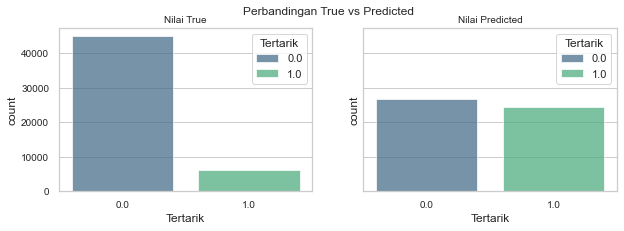

In [24]:
model.visualize(y_test, y_pred,'Tertarik')

In [25]:
# Confusion Matrix
# Confusion matrix seringkali juga dikenal sebagai error matrix.

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[26594, 18415],
       [  161,  6151]], dtype=int64)

In [26]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}\t',f'FP: {fp}')
print(f'FN: {fn}\t\t',f'TP: {tp}')

TN: 26594	 FP: 18415
FN: 161		 TP: 6151


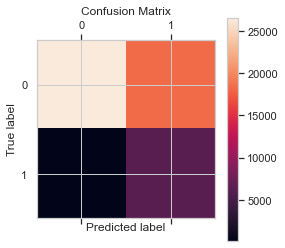

In [27]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Artificial Neural Network (ANN) Classification
Prosedur Artificial Neural Network (ANN Classification)

In [28]:
# y_train dan y_test dalam array
y_train = y_train.to_numpy().reshape(y_train.shape[0],1)
y_test = y_test.to_numpy().reshape(y_test.shape[0],1)

In [29]:
# cetak ukuran array
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(119747, 10)
(119747, 1)
(51321, 10)
(51321, 1)


In [30]:
# Array Transpose
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10, 119747)
(1, 119747)
(10, 51321)
(1, 51321)


In [31]:
# sigmoid function dan gradient

def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

In [32]:
# Ukuran layer

def layer_sizes(X, Y, n_h):
    
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [33]:
# Inisialisasi parameter. Weight diinisialisasi secara random, bias diinisialisasi sama dengan nol.

def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) *0.01
    b1 = np.zeros((n_h , 1))
    W2 = np.random.randn(n_y, n_h) *0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [34]:
# Forward propagation. Data akan melewati tiap neuron pada hidden layer sampai kepada output layer.

def forward_propagation(X, parameters):

    W1 = parameters["W1"] # Weight
    b1 = parameters["b1"] # bias
    W2 = parameters["W2"] # Weight
    b2 = parameters["b2"] # bias
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    
    A_and_Z = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, A_and_Z

In [35]:
# Menghitung binary cross entropy/Log Loss dari y predicted dan real values

def compute_cost(A2, Y):

    m = Y.shape[1] # number of example

    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1-A2))
    cost = -1/m * np.sum(logprobs) 
      
    cost = float(np.squeeze(cost))  
    assert(isinstance(cost, float))
    
    return cost

In [36]:
# Backward propagation. Proses ini bermaksud untuk menyesuaikan kembali tiap weight dan bias 
# berdasarkan error yang didapat pada saat forward propagation

def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    lambd = 0.1 #-- regularization hyperparameter, scalar
    
    dZ2= A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T) + lambd/m
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid_derv(A1) )
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [37]:
# Update parameter setelah melalui sekali forward dan backward propagation

def update_parameters(parameters, grads, learning_rate = 1):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [38]:
# Artificial Neural Network Classification

def ANN(X, Y, n_h, num_iterations = 100):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y, n_h)[0]
    n_h = layer_sizes(X, Y, n_h)[1]
    n_y = layer_sizes(X, Y, n_h)[2]
    
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
         
        A2, cache = forward_propagation(X, parameters)
 
        cost = compute_cost(A2, Y)
        cost_list.append(cost)
 
        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads, 0.3)

    return parameters

Text(0, 0.5, 'cost')

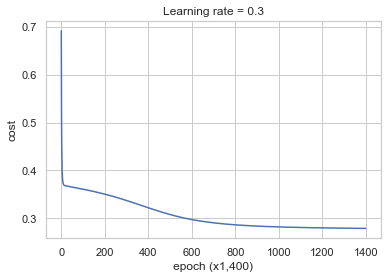

In [39]:
# Plot graph of cost vs epoch

cost_list=[]
n_h = 15
iters= 1400
it = range(iters)
learning_rate = 0.3
parameters = ANN(X_train, y_train, n_h, iters)
plt.plot(it,cost_list)
plt.title("Learning rate = " + str(learning_rate))
plt.xlabel('epoch (x1,400)')
plt.ylabel('cost')

In [40]:
# Validasi training accuracy

A2, cache = forward_propagation(X_train,parameters)
np.set_printoptions(threshold=np.inf)
train_predictions = np.zeros((A2.shape[0], A2.shape[1]))
train_predictions[A2>0.5]=1

print ("Training Accuracy = ", (np.sum(train_predictions == y_train))/ y_train.shape[1] * 100)

Training Accuracy =  87.90282846334355


In [41]:
# Validasi test accuracy

A2, cache = forward_propagation(X_test,parameters)
np.set_printoptions(threshold=np.inf)
test_predictions = np.zeros((A2.shape[0], A2.shape[1]))
test_predictions[A2>0.5]=1

print ("Testing Accuracy = ", (np.sum(test_predictions == y_test))/ y_test.shape[1] * 100)

Testing Accuracy =  87.70094113520781


### Kesimpulan
##### 1. Pemilihan dataset yang baik sebelum di terapkan pada proses tertentu adalah bergantung pada:
#####     a. dataset yang bebas dari error, misalnya isi kolom yang tidak lengkap, ada nilai null atau kosong.
#####     b. mengkonversi tipe data object menjadi data numerikal.
##### 2. Hasil akhir baik berupa `accuracy` maupun `precision` akan berbeda antara satu model dengan model lainnya.
##### 3. Menurut hasil percobaan Model `Artificial Neural Network` lebih akurat dibanding dengan `Naive Bayes`.
                     Akurasi
       Naive Bayes ~ 63.80
       ANN         ~ 87.70
       
       Dari Hasil Percobaan dapat disimpulkan bahwa pelanggan mempunyai kecenderungan untuk tidak
       membeli kendaraan berdasarkan tingkat akurasi di atas 50% baik melalui model Naive Bayes
       maupun model Artificial Neural Network.